In [29]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("iris.csv")


In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
df.shape

(150, 5)

In [7]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [12]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
df['petal_length'].unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [14]:
df['petal_length'].nunique()

43

In [15]:
df[df['species'] == "Iris-setosa"]

,sepal_length,sepal_width,petal_length,petal_width,species


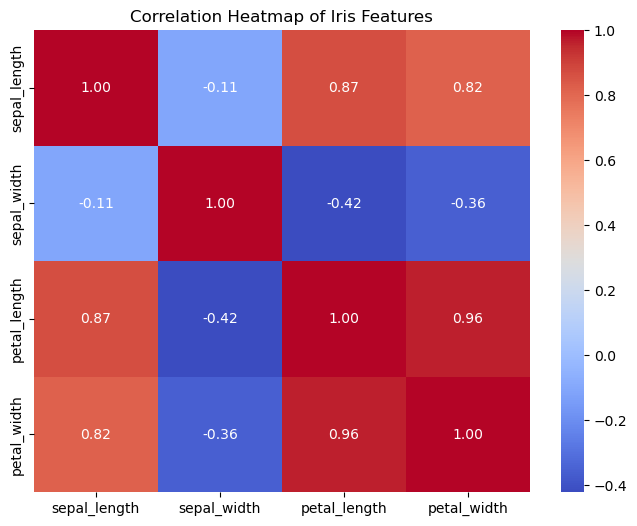

In [16]:


# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns="species").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Iris Features")
plt.show()


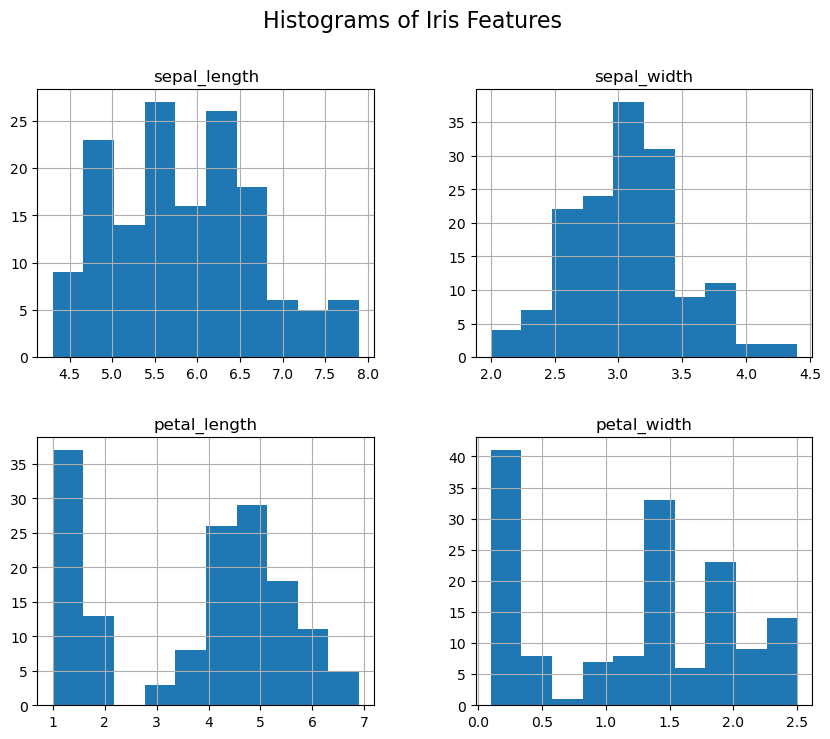

In [17]:

# Histogram
df.hist(figsize=(10, 8))
plt.suptitle("Histograms of Iris Features", fontsize=16)
plt.show()


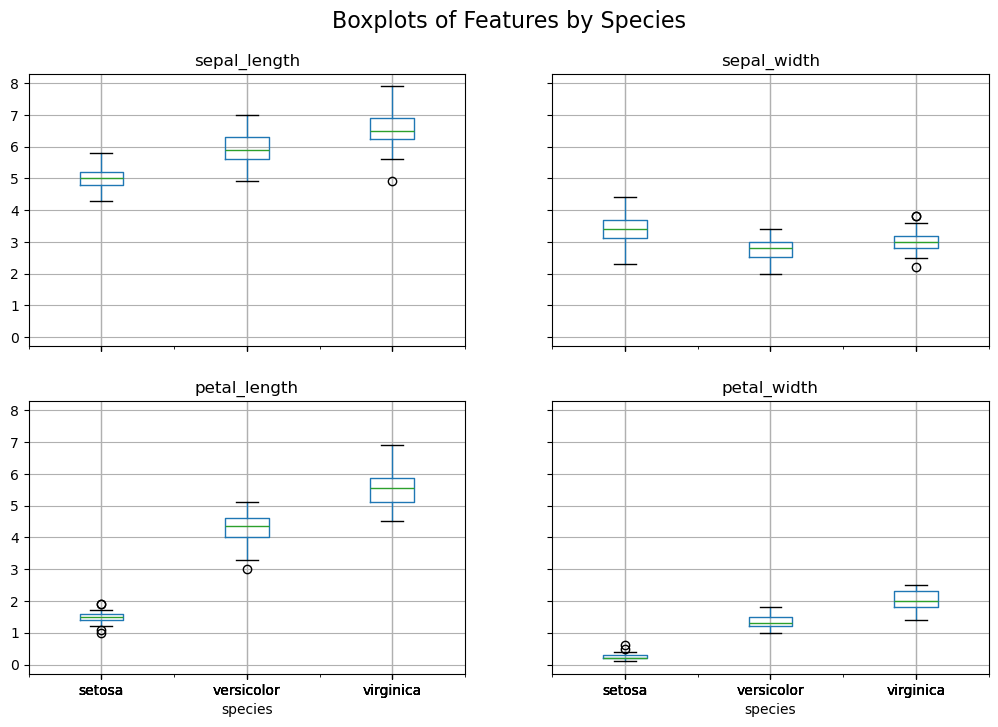

In [18]:

# Boxplots
df.boxplot(column=["sepal_length", "sepal_width", "petal_length", "petal_width"], by="species", figsize=(12, 8))
plt.suptitle("Boxplots of Features by Species", fontsize=16)
plt.show()


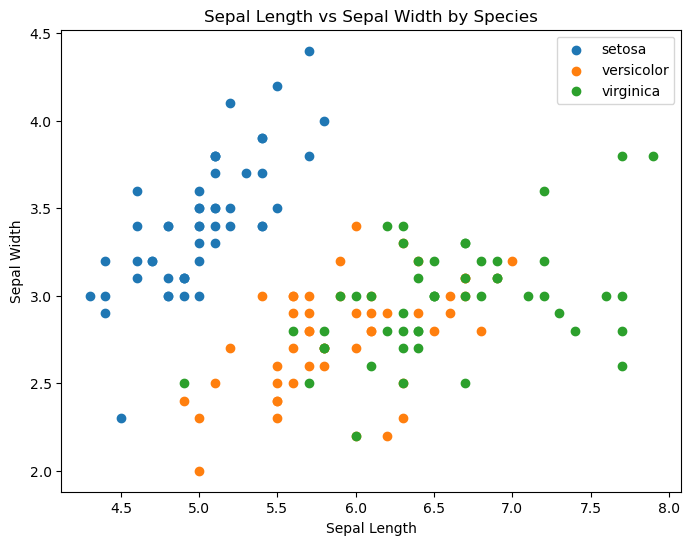

In [19]:

# Scatter plot Sepal
plt.figure(figsize=(8, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width by Species")
plt.legend()
plt.show()


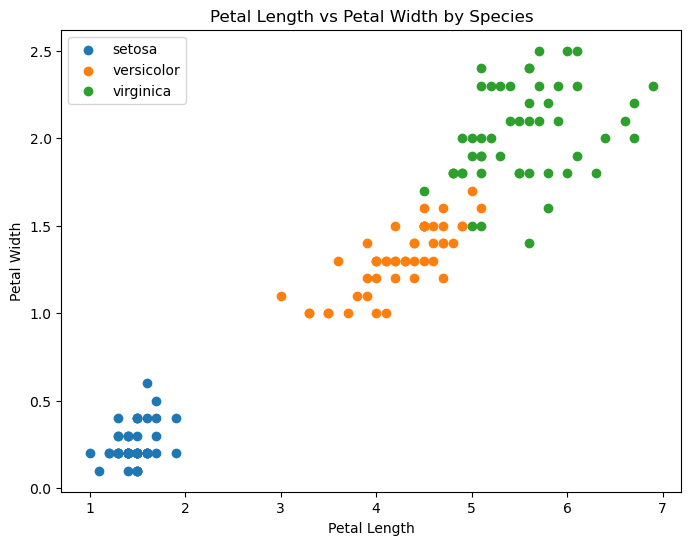

In [20]:

# Scatter plot Petal
plt.figure(figsize=(8, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['petal_length'], subset['petal_width'], label=species)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Petal Length vs Petal Width by Species")
plt.legend()
plt.show()


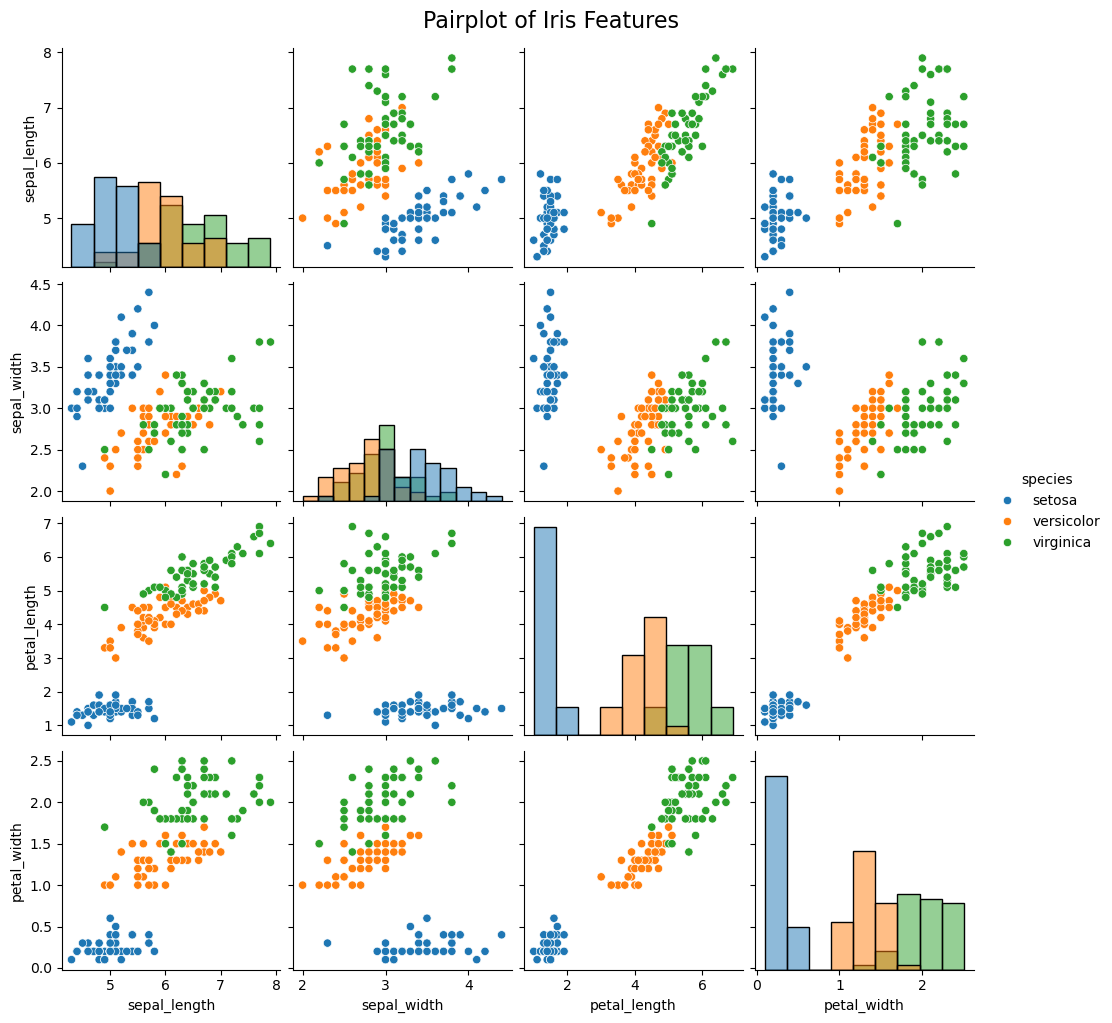

In [21]:

# Pairplot
sns.pairplot(df, hue="species", diag_kind="hist", height=2.5)
plt.suptitle("Pairplot of Iris Features", y=1.02, fontsize=16)
plt.show()


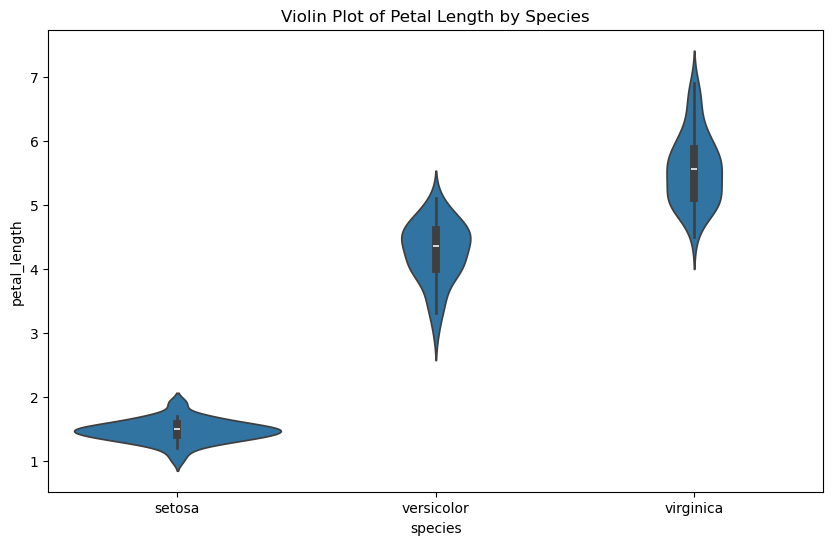

In [22]:

# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x="species", y="petal_length", data=df)
plt.title("Violin Plot of Petal Length by Species")
plt.show()


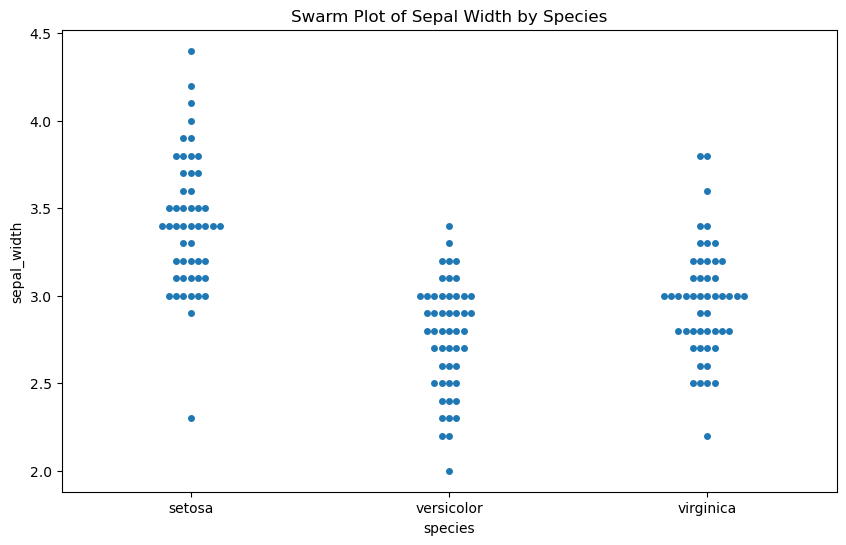

In [23]:

# Swarm Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x="species", y="sepal_width", data=df)
plt.title("Swarm Plot of Sepal Width by Species")
plt.show()


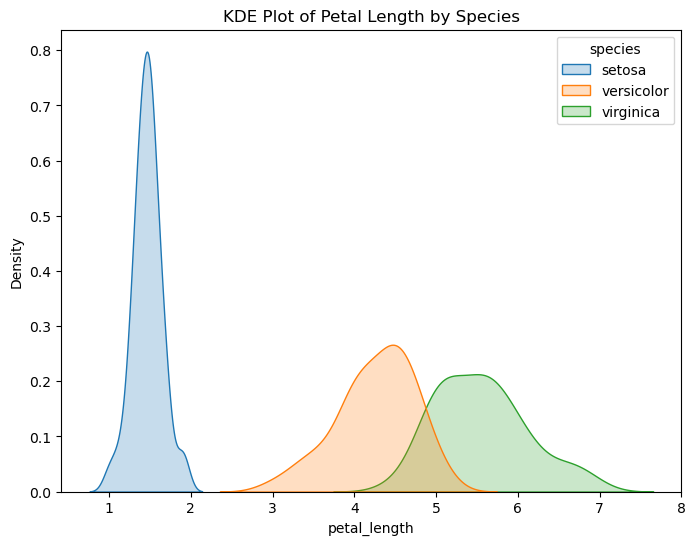

In [24]:

# KDE Density Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="petal_length", hue="species", fill=True)
plt.title("KDE Plot of Petal Length by Species")
plt.show()


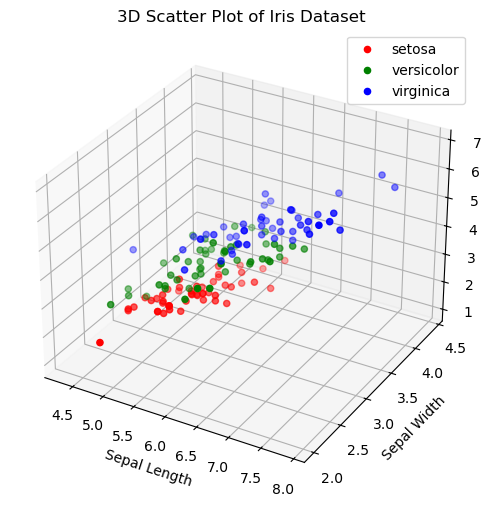

In [25]:

# 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

species_list = df['species'].unique()
colors = ['r', 'g', 'b']

for species, color in zip(species_list, colors):
    subset = df[df['species'] == species]
    ax.scatter(subset['sepal_length'], subset['sepal_width'], subset['petal_length'], label=species, c=color)

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
plt.title("3D Scatter Plot of Iris Dataset")
plt.legend()
plt.show()


In [ ]:

# For binary classification, let's use only 2 classes (e.g., Setosa and Versicolor)
X = X[y != 2]
y = y[y != 2]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [30]:
# Use Decision Tree as base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost classifier
ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

# Fit the model
ada_clf.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [32]:
# Predict on test data
y_pred = ada_clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

